This script plots yearly averaged input data and calculates trends 

In [1]:
import h5py
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
#fdat=u"Seward-DayMet-1985_2016.h5"
fdat=u"spinup-100yr.h5"
ddat = h5py.File(fdat, 'r')

In [3]:
print ddat.keys()

[u'air temperature [K]', u'incoming shortwave radiation [W m^-2]', u'precipitation rain [m s^-1]', u'precipitation snow [m SWE s^-1]', u'relative humidity [-]', u'time [s]', u'wind speed [m s^-1]']


In [8]:
Tair=ddat['air temperature [K]'][:]
sr=ddat['incoming shortwave radiation [W m^-2]'][:]
pr_rain=ddat['precipitation rain [m s^-1]'][:]
pr_snow=ddat['precipitation snow [m SWE s^-1]'][:]
rh=ddat['relative humidity [-]'][:]
wnd=ddat['wind speed [m s^-1]'][:]
time=ddat['time [s]'][:]

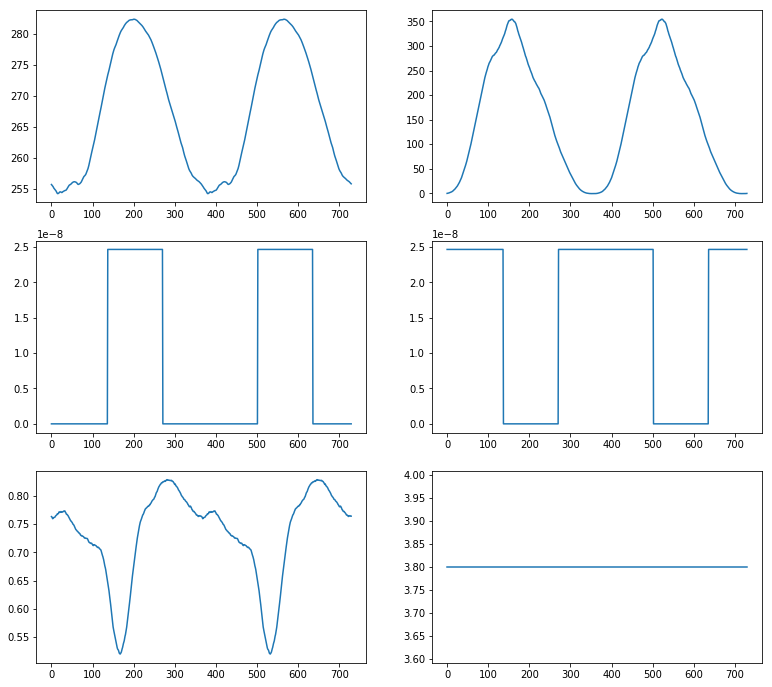

In [20]:
fig = plt.figure()
fig.set_figheight(12); fig.set_figwidth(13)
fig.add_subplot(3,2,1)
plt.plot(Tair[0:730])
fig.add_subplot(3,2,2)
plt.plot(sr[0:730])
fig.add_subplot(3,2,3)
plt.plot(pr_rain[0:730])
fig.add_subplot(3,2,4)
plt.plot(pr_snow[0:730])
fig.add_subplot(3,2,5)
plt.plot(rh[0:730])
fig.add_subplot(3,2,6)
plt.plot(wnd[0:730])

In [9]:
def plot_aver(data,color,mode):
    n=len(data)
    nyrs=int(n/365)
    a=data[0:n]
    b=np.reshape(a, (nyrs, 365))
    c=np.zeros(nyrs)
    for i in range(nyrs):
        c[i]=np.mean(b[i,:])
   
    if mode=='anom':
        p=np.polyfit(range(36), c-np.mean(c), 1)
        plt.plot(np.zeros(len(c)),'k--')
        plt.plot(c-np.mean(c),color,linewidth=2.0)
    else:
        p=np.polyfit(range(36), c, 1)
        plt.plot(np.ones(len(c))*np.mean(c),'k--')
        plt.plot(c,color,linewidth=2.0)

    print 'slope:',round(p[0],2),'   intercept:',round(p[1],2)
    y=[p[0]*i+p[1]  for i in range(36)]
    plt.plot(y)
    plt.tick_params(labelsize=16)
    return c

Note: plot_aver function has a mode option. mode='anom' calculates a deviation from mean.

Tair


TypeError: expected x and y to have same length

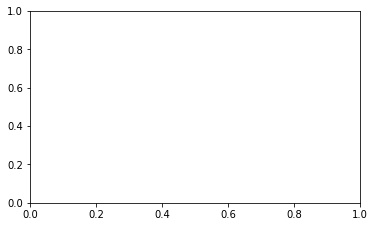

In [10]:
fig = plt.figure()
fig.set_figheight(12); fig.set_figwidth(13)
fig.add_subplot(3,2,1)
print 'Tair'
Tave=plot_aver(Tair-273.15,'ro-','')
plt.ylabel('Annual air temperature [$^oC$]', fontsize=16)
plt.title('Nome, Alaska, 1980-2015', fontsize=20);

fig.add_subplot(3,2,2)
print 'Shortwave radiation'
shave=plot_aver(sr,'ro-','')
plt.ylabel('Shortwave radiation [$W m^{-2}$]', fontsize=16)
plt.title('Nome, Alaska, 1980-2015', fontsize=20);

fig.add_subplot(3,2,3)
print 'Precipitation rain'
pr_rain_ave=plot_aver(pr_rain,'ro-','')
plt.ylabel('Precipitation rain [$m s^{-1}$]', fontsize=16)

fig.add_subplot(3,2,4)
print 'Precipitation snow'
pr_snow_ave=plot_aver(pr_snow,'ro-','anom')
plt.ylabel('Precipitation snow [$m SWE s^{-1}$]', fontsize=16)

fig.add_subplot(3,2,5)
print 'Relative humidity'
rh_ave=plot_aver(rh,'ro-','')
plt.xlabel('Time [yr]', fontsize=16)   
plt.ylabel('Relative humidity [-]', fontsize=16)

fig.add_subplot(3,2,6)
print 'Wind speed'
wnd_ave=plot_aver(wnd,'ro-','')
plt.xlabel('Time [yr]', fontsize=16)   
plt.ylabel('Wind speed [$m s^{-1}$]', fontsize=16)

fig.tight_layout()